# Route Maps by Parade

This notebook will attempt to make sensable route maps by parade

In [1]:
#imports and such
from datetime import datetime
import geopandas as gpd
import geoplot as gplt
import os
from matplotlib import pyplot as plt
import shapely
import pyproj
import pandas as pd
import warnings

In [2]:
#very annoying warnings coming from pyproj
warnings.filterwarnings('ignore', category=FutureWarning, module='pyproj')

In [3]:
def lp(v):
    print(f"[{datetime.now()}] {v}")

lp("Starting...")

[2025-02-25 16:44:47.076476] Starting...


In [4]:
mapsPath = f"{os.curdir}{os.sep}RouteMaps{os.sep}"
lp(f"Maps Path:  {mapsPath}")

if not os.path.exists(mapsPath):
    lp(f"Creating  {mapsPath}")
    os.mkdir(mapsPath)

[2025-02-25 16:44:47.081428] Maps Path:  ./RouteMaps/


In [5]:
dataPath = f"{os.curdir}{os.sep}datasets{os.sep}"
lp(f"Data Path:  {dataPath}")

[2025-02-25 16:44:47.086825] Data Path:  ./datasets/


In [6]:
#all the parade routes
routesDf = gpd.read_file(f"{dataPath}paradeRoutes.geojson")
#routesDf['geometry'] = routesDf['geometry'].map(lambda x: x.geoms[0])
routesDf.set_index('parade', inplace=True)
routesDf.head()

,location,numfloats,formation,disband,objectid,date,time,shape_stlength,day,geometry
parade,,,,,,,,,,
Chaos,Uptown,None,Napoleon and Magazine,Canal and Roosevelt Way,17,2025-02-27 18:30:00+00:00,6:30pm,18801.130441472782,2nd Thursday,"MULTILINESTRING ((-90.10137 29.92082, -90.1018..."
Cleopatra,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,4,2025-02-21 18:00:00+00:00,6:00pm,21161.075592614441,1st Friday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ..."
Krewe Du Vieux,Downtown,None,Marigny and Decatur,Andrew Higgins and S. Peters,34,2025-02-15 18:30:00+00:00,6:30pm,15476.953108061272,Walking Parade,"MULTILINESTRING ((-90.05506 29.96271, -90.0551..."
Tucks,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,22,2025-03-01 12:30:00+00:00,12:30pm,21095.835274003577,2nd Saturday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ..."
Bohème,Downtown,None,Decatur St. from Mandeville St to Music St.,Basin St and Canal St.,36,2025-02-14 19:00:00+00:00,7:00pm,12290.192829423802,Walking Parade,"MULTILINESTRING ((-90.05392 29.96277, -90.0550..."


In [7]:
#convert multilines to singlelines
#routesDf['geometry'] = routesDf['geometry'].map(lambda x: x.geoms[0])

In [8]:
#all of our streets
streetsDf = gpd.read_file(f"{dataPath}streets.geojson")
streetsDf.head()

,munileft,mtfcc,strtetype,maintby,centerlineid,stateright,fromleft,joinid,roadlevel,lasteditor,...,ctyroute,astrtetype,msagleft,fedrtetype,afedrte,inwater,toleft,shape_stlength,fullnameabv,geometry
0,New Orleans,None,None,None,2501358,LA,6200,460,None,CMARD,...,None,None,None,None,None,None,6298,374.69106670567925,Constance St,"MULTILINESTRING ((-90.12482 29.92233, -90.1249..."
1,New Orleans,None,None,None,2507761,LA,2600,873,None,CMARD,...,None,None,None,None,None,None,2698,351.09598315083429,Hamilton St,"MULTILINESTRING ((-90.1272 29.96419, -90.12711..."
2,New Orleans,None,None,None,2510743,LA,0,671,None,CMARD,...,None,None,None,None,None,None,0,50.711363770514147,Encampment St,"MULTILINESTRING ((-90.08325 29.99944, -90.0832..."
3,New Orleans,None,None,None,2515776,LA,5461,1732,None,DBALBERT,...,None,None,None,None,None,None,5499,165.29887948728282,N Rampart St,"MULTILINESTRING ((-90.01771 29.96031, -90.0172..."
4,New Orleans,None,None,None,2522988,LA,10701,1704,None,CMARD,...,None,None,None,None,None,None,10731,252.75257190809734,Prentiss Ave,"MULTILINESTRING ((-89.96195 30.0232, -89.96185..."


In [9]:
#this created plenty of warning but we are just loading it so we can see the mississppi and maybe some other water if it comes to that
riverDf = gpd.read_file(f"{dataPath}MississippiRiver.zip")
riverDf.head()

/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 3 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 4 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 5

,WATER2_ID,FEATURE,LENGTH,XXX,geometry
0,1,0,0.0,Region,"MULTIPOLYGON (((-90.54858 30.16849, -90.54896 ..."
1,2,0,0.0,Region,"MULTIPOLYGON (((-90.02944 29.96027, -90.02743 ..."
2,3,0,0.0,Region,"MULTIPOLYGON (((-90.3685 30.05726, -90.36874 3..."
3,4,0,0.0,None,"MULTIPOLYGON (((-89.4196 30.03959, -89.41818 3..."
4,5,0,0.0,None,"MULTIPOLYGON (((-89.37342 30.0375, -89.31526 3..."


In [10]:
sorted(routesDf.index)

['Alla',
 'Babylon',
 'Bacchus',
 'Barkus',
 'Bohème',
 'Carrollton',
 'Chaos',
 'Chewbacchus',
 'Choctaw',
 'Cleopatra',
 'Crescent City',
 "D'etat",
 'Druids',
 'Elks',
 'Endymion',
 'Femme Fatale',
 'Freret',
 'Hermes',
 'Iris',
 'King Arthur',
 'Krewe Du Vieux',
 'Mars',
 'Mid-City',
 'Morpheus',
 'Muses',
 'NOMTOC',
 'Okeanos',
 'Orpheus',
 'Oshun',
 'Pontchartrain',
 'Proteus',
 'Pygmalion',
 'Rex',
 'Sparta',
 'Thoth',
 'Tucks',
 'Zulu']

In [11]:
class MyTransform:

    
    
    def __init__(self,extent, name):
        self.extent = extent
        self.name = name
        
        self.epsg = '32615'
        self.epsgRoute = routesDf.loc[[self.name],'geometry'].to_crs(f"EPSG:{self.epsg}")

        self.UTMtoWGS = pyproj.Transformer.from_crs(self.epsgRoute.crs, routesDf.crs)
        

    def transform2XY(self,lon,lat):
        lonTrans = self.extent[0] - self.extent[2]
        latTrans = self.extent[1] - self.extent[3]
    
        x = abs((lon - self.extent[0]) / lonTrans)
        y = abs((lat - self.extent[1]) / latTrans)
    
        return (x,y)

    def figSize(self, figWidth=10):

        lonLen = self.extent[2] - self.extent[0]
        latLen = self.extent[3] - self.extent[1]

        figHeight = figWidth * (latLen / lonLen)
        
        return (figWidth, figHeight)

    def extentWithBuffer(self,setExtent = True, buffer = 0.001):

        newExtent = shapely.geometry.box(*self.extent).buffer(buffer).bounds

        if setExtent:
            self.extent = newExtent
        
        return newExtent


    def xyOnRoute(self, distance):
        epsgPoint = self.epsgRoute.interpolate(distance,normalized=True)
                
        wgsPoint = self.UTMtoWGS.transform(epsgPoint.x, epsgPoint.y)

                
        return self.transform2XY(wgsPoint[1][0],wgsPoint[0][0])
    
        
        

[2025-02-25 16:44:49.441826] Creating Map for Chewbacchus		Fig Size: (10, 10.123919379498265)	Extent:  (-90.065688549738, 29.953192035750998, -90.04914601742199, 29.969939562101)	CRS:  <geoplot.crs.Mercator object at 0x7f78d2f55a50>
[2025-02-25 16:44:50.406942] Finished Chewbacchus in 0:00:00.969514


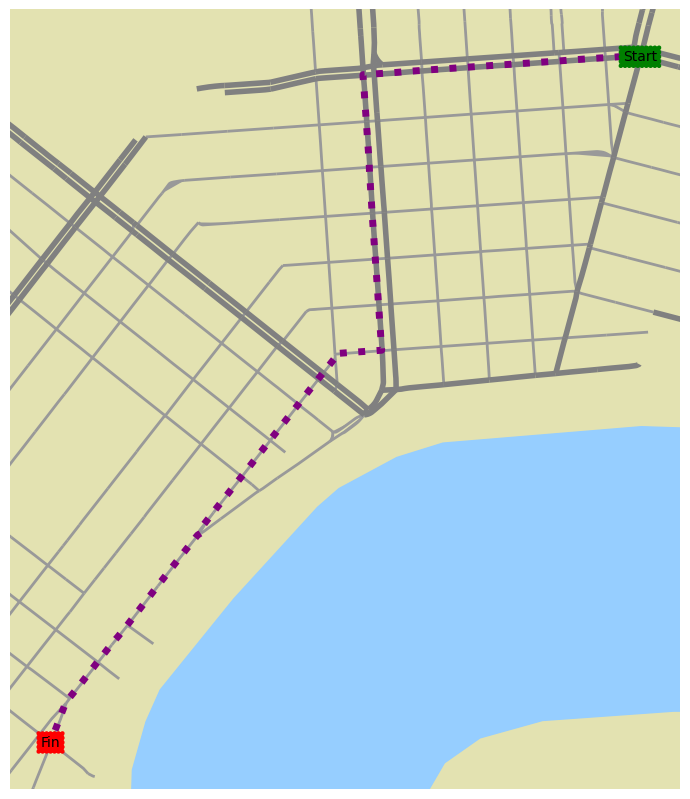

In [12]:
streetClasses = ['Local', 'Major Arterial', 'Other', 'Umimproved', 'Ramp','Freeway', 'Minor Arterial', None]



def plotParade(name="Chewbacchus", figWidth = 10, savePlot=False):

    startTime = datetime.now()

    crs = gplt.crs.Mercator()

    
    myTransform = MyTransform(routesDf.loc[[name],'geometry'].total_bounds, name)

    extent = myTransform.extentWithBuffer()

    
    
    figSize =  myTransform.figSize(figWidth)

    lp(f"Creating Map for {name}\t\tFig Size: {figSize}\tExtent:  {extent}\tCRS:  {crs}")

    
    fig, ax = plt.subplots(figsize=figSize, subplot_kw={'projection': crs})

    streetNameMask = streetsDf.intersects(routesDf.loc[name,'geometry'])

    usefulStreetsList = streetsDf[streetNameMask]['fullnameabv'].unique()

    streetMask = streetsDf['fullnameabv'].isin(usefulStreetsList)

    streetTypeMask = {}
    for st in streetClasses:
        streetTypeMask[st] = streetMask & ( streetsDf['roadclass'] == st )


    ax.set_facecolor((0.89, 0.886, 0.694))
    gplt.polyplot(riverDf, ax=ax, extent=extent, color=(0.588,0.808,1.0), zorder=-2)

    #plot street types
    gplt.polyplot(streetsDf[streetTypeMask['Freeway']], ax=ax, extent=extent, color=(0.4,0.4,0.4), linewidth=5, zorder=-1)
    
    gplt.polyplot(streetsDf[streetTypeMask['Local']], ax=ax, extent=extent, color=(0.6,0.6,0.6), linewidth=2, zorder=3)
    gplt.polyplot(streetsDf[streetTypeMask['Minor Arterial']], ax=ax, extent=extent, color=(0.55,0.55,0.55), linewidth=3, zorder=4)
    gplt.polyplot(streetsDf[streetTypeMask['Major Arterial']], ax=ax, extent=extent, color=(0.5,0.5,0.5), linewidth=4, zorder=5)

    ax.text(*myTransform.xyOnRoute(0), 'Start', transform=ax.transAxes,zorder=11,\
           c='black',\
           horizontalalignment='center',\
           verticalalignment='center',\
           bbox={'boxstyle':'roundtooth',
                'color':'green'
               })
    
    ax.text(*myTransform.xyOnRoute(1), 'Fin', transform=ax.transAxes,zorder=11,\
           c='black',\
           horizontalalignment='center',\
           verticalalignment='center',\
           bbox={'boxstyle':'roundtooth',
                 'color':'red'
                })
    
    gplt.polyplot(routesDf.loc[[name],'geometry'], ax=ax, extent=extent, edgecolor='purple',linewidth=5, zorder=10, linestyle='dotted')
   
    
    if savePlot:
        fig.savefig(f"{mapsPath}{name}.svg")
        plt.close()

    lp(f"Finished {name} in {datetime.now()-startTime}")

plotParade()

In [13]:
startTime = datetime.now()
lp("Creating all maps and saving...")
for p in sorted(routesDf.index):

    lp(f"calling:  plotParade({p}, savePlot=True)")
    plotParade(p, savePlot=True)

lp(f"Total time {datetime.now() - startTime}")

[2025-02-25 16:44:57.646580] Creating all maps and saving...
[2025-02-25 16:44:57.646714] calling:  plotParade(Alla, savePlot=True)
[2025-02-25 16:44:57.649335] Creating Map for Alla		Fig Size: (10, 6.849103004903176)	Extent:  (-90.11598188915501, 29.919291714901, -90.06515484430099, 29.954103681465)	CRS:  <geoplot.crs.Mercator object at 0x7f78cc959490>
[2025-02-25 16:45:06.302500] Finished Alla in 0:00:08.655763
[2025-02-25 16:45:06.302669] calling:  plotParade(Babylon, savePlot=True)
[2025-02-25 16:45:06.304725] Creating Map for Babylon		Fig Size: (10, 9.310473147192152)	Extent:  (-90.102936988066, 29.919819795492, -90.06611406249499, 29.954103681465)	CRS:  <geoplot.crs.Mercator object at 0x7f78cd382550>
[2025-02-25 16:45:12.104405] Finished Babylon in 0:00:05.801714
[2025-02-25 16:45:12.104592] calling:  plotParade(Bacchus, savePlot=True)
[2025-02-25 16:45:12.106608] Creating Map for Bacchus		Fig Size: (10, 9.016019948240151)	Extent:  (-90.102936988066, 29.916155278351, -90.06084701

In [14]:
lp("FIN")

[2025-02-25 16:48:58.813939] FIN
